In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [3]:
#get and save data to dataframes
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

#  Data Analysis and Visualization

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Lets see what kind information we have**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#checking for null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df_train.duplicated().sum()

0

In [10]:
df_test.duplicated().sum()

0

In [11]:
#function for filling null values

def fill_elements(df):
    df.columns = df.columns.str.strip()
    df=df.drop('Cabin', axis=1)
    df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'))
    df['Fare'] = df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('mean'))
    df = df.dropna()
    return df

In [12]:
df_test = fill_elements(df_test)
df_train = fill_elements(df_train)

In [13]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Lets see how much survived men and women**

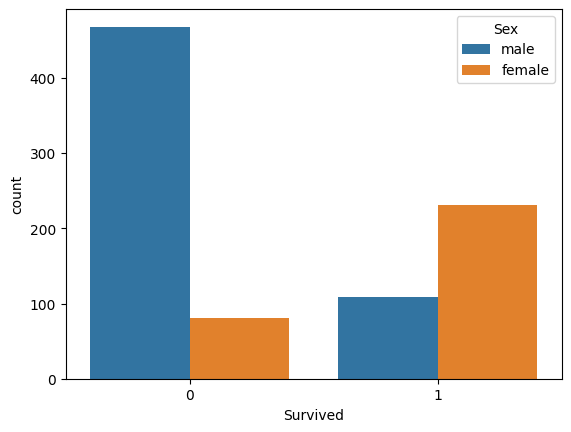

In [15]:
sns.countplot(df_train, x='Survived', hue='Sex')
plt.show()

**We see from this plot that women survived mostly**

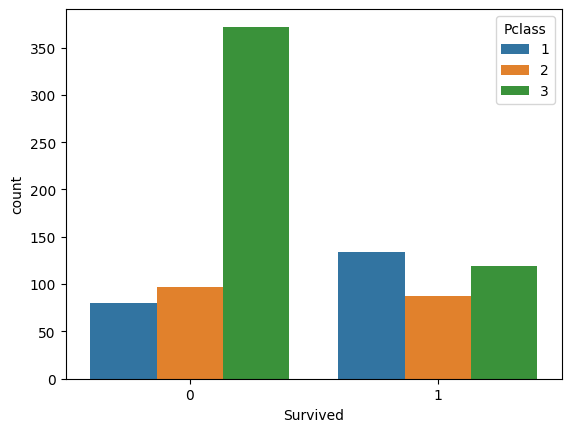

In [16]:
sns.countplot(df_train, x='Survived', hue='Pclass')
plt.show()

**We see from this plot that passangers from 3d class havent survived mostly**

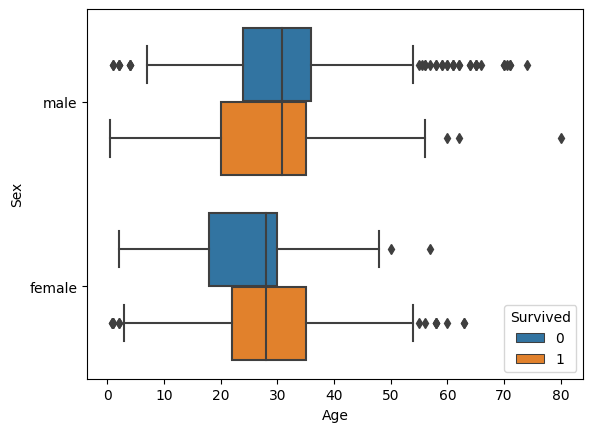

In [17]:
sns.boxplot(data=df_train, x='Age', y='Sex', hue='Survived')
plt.show()

**Median of values is near 30 y.o**

In [18]:
X_y_train = pd.get_dummies(df_train.drop(['Name','Ticket', 'PassengerId'], axis=1), drop_first=True, dtype=int)
X_test = pd.get_dummies(df_test.drop(['Name','Ticket', 'PassengerId'], axis=1), drop_first=True, dtype=int)

**Lets see correlation between values**

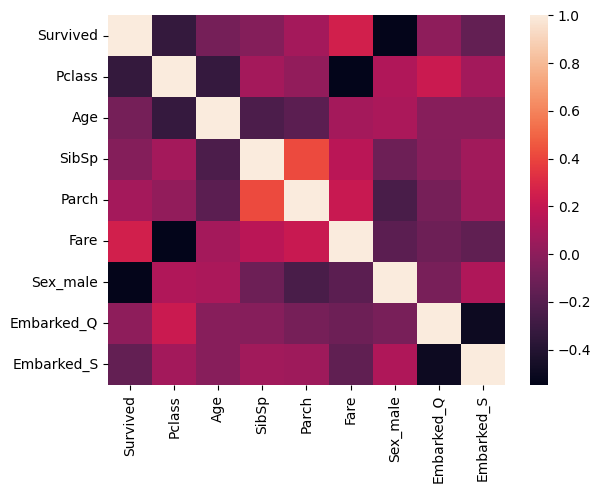

In [19]:
sns.heatmap(data=X_y_train.corr())
plt.show()

In [20]:
corr_survived = X_y_train.corr()['Survived'].sort_values()[:-1]
X_train = X_y_train.drop('Survived', axis=1)
y_train = X_y_train['Survived']

In [21]:
corr_survived

Sex_male     -0.541585
Pclass       -0.335549
Embarked_S   -0.151777
Age          -0.085363
SibSp        -0.034040
Embarked_Q    0.004536
Parch         0.083151
Fare          0.255290
Name: Survived, dtype: float64

**Lets see correlation between survived and values**

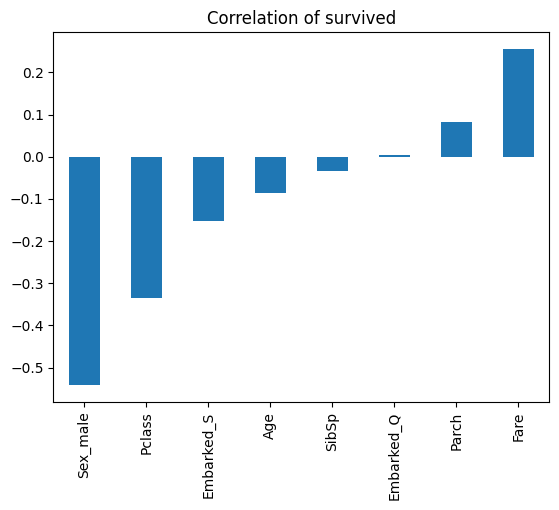

In [22]:
corr_survived.plot(kind='bar')
plt.title("Correlation of survived")
plt.show()

#  Model

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 

In [24]:
scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.82520863, -0.59275201,  0.43135024, ...,  0.73534203,
        -0.30794088,  0.61679395],
       [-1.57221121,  0.64047063,  0.43135024, ..., -1.35991138,
        -0.30794088, -1.62128697],
       [ 0.82520863, -0.28444635, -0.47519908, ..., -1.35991138,
        -0.30794088,  0.61679395],
       ...,
       [ 0.82520863, -0.13679038,  0.43135024, ..., -1.35991138,
        -0.30794088,  0.61679395],
       [-1.57221121, -0.28444635, -0.47519908, ...,  0.73534203,
        -0.30794088, -1.62128697],
       [ 0.82520863,  0.17801214, -0.47519908, ...,  0.73534203,
         3.24737656, -1.62128697]])

In [26]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler

array([[ 0.82520863,  0.37070318, -0.47519908, ...,  0.73534203,
         3.24737656, -1.62128697],
       [ 0.82520863,  1.33415837,  0.43135024, ..., -1.35991138,
        -0.30794088,  0.61679395],
       [-0.37350129,  2.49030459, -0.47519908, ...,  0.73534203,
         3.24737656, -1.62128697],
       ...,
       [ 0.82520863,  0.67900884, -0.47519908, ...,  0.73534203,
        -0.30794088,  0.61679395],
       [ 0.82520863,  0.04488049, -0.47519908, ...,  0.73534203,
        -0.30794088,  0.61679395],
       [ 0.82520863,  0.04488049,  0.43135024, ...,  0.73534203,
        -0.30794088, -1.62128697]])

In [27]:
X_tr, X_true, y_tr, y_true = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [28]:
def metrics(model):
    y_pred = model.predict(X_true)
    accuracy = model.score(X_true, y_true)
    print(f'Accuracy = {accuracy}')
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred, labels=model.classes_))
    disp.plot()

# Logistic Regression

Accuracy = 0.7865168539325843


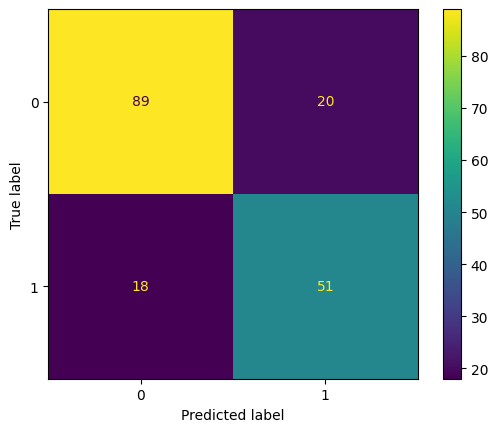

In [29]:
log_reg = LogisticRegressionCV(cv=5, max_iter=500)
model = log_reg.fit(X_tr, y_tr)
metrics(model)

# DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier()

In [31]:
param_grid = {
    'max_depth': [None, 10, 25, 50, 100, 120],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4, 10]
}

In [32]:
grid_model = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

Accuracy = 0.797752808988764


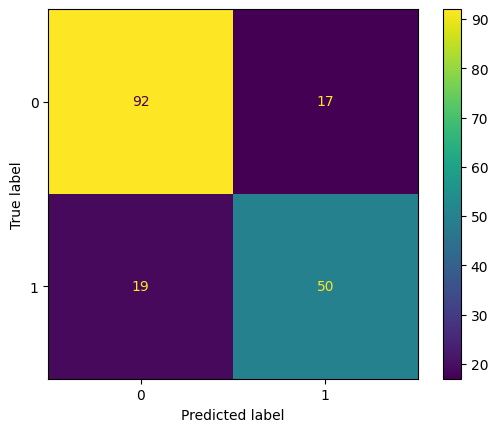

In [33]:
model_grid_tr = grid_model.fit(X_tr, y_tr)
metrics(model_grid_tr.best_estimator_)

In [34]:
model_grid_tr.best_params_

{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

# RandomForest

In [35]:
rf = RandomForestClassifier()

In [36]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 4],
}


In [37]:
grid_model_random = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

Accuracy = 0.797752808988764


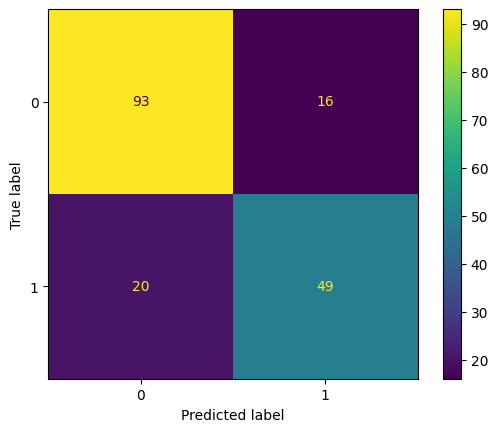

In [38]:
model_grid_random = grid_model_random.fit(X_tr, y_tr)
metrics(model_grid_random.best_estimator_)

In [39]:
model_grid_random.best_params_

{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 150}

# Choosing this model for prediction

In [40]:
y_test_pred = model_grid_random.predict(X_test_scaler)

# Result for Kaggle

In [41]:
result = pd.DataFrame()
result['PassengerId'] = df_test['PassengerId']
result['Survived'] = y_test_pred
result.to_csv("submission.csv", index=False)

# Lets vizualize which type of passangers are survived 

In [42]:
df_test['Survived'] = y_test_pred

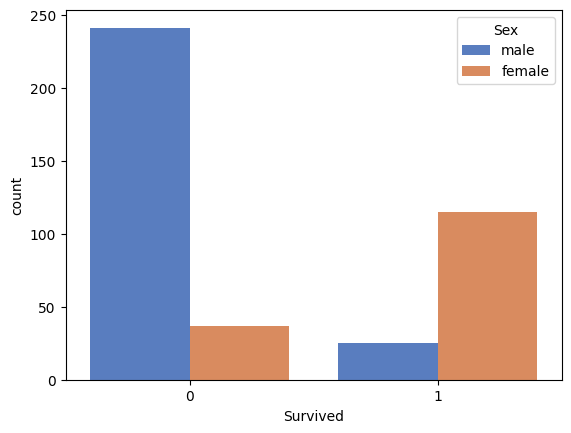

In [43]:
sns.set_palette("muted")
sns.countplot(df_test, x='Survived', hue='Sex')
plt.show()

**We have same results as with train data. Mostly women are survived**

In [44]:
survived = len(df_test[df_test['Survived']==1])
unsurvived = len(df_test[df_test['Survived']==0])

print(f"Count of survived passangers = {survived}")
print(f"Count of unsurvived passangers = {unsurvived}")

Count of survived passangers = 140
Count of unsurvived passangers = 278


**Lets see the percent of survival by xlasses**

In [71]:
class_groups = df_test.groupby(by=['Pclass'])['Survived'].mean()
class_groups


Pclass
1    0.626168
2    0.344086
3    0.188073
Name: Survived, dtype: float64

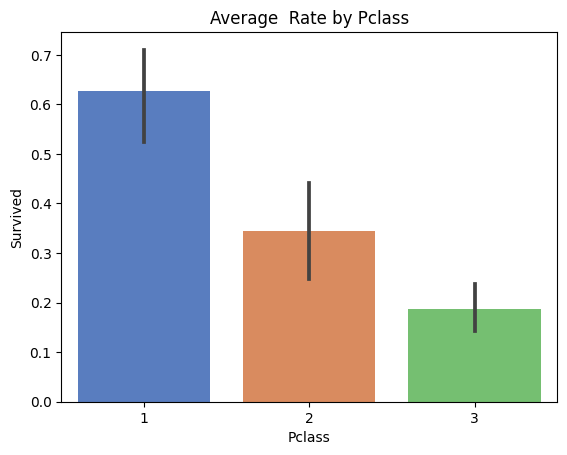

In [74]:
sns.barplot(data=df_test, x='Pclass', y='Survived')
plt.title('Average  Rate by Pclass')
plt.show()

# **As we see the largest number of survivors is from the 1st class.**